In [3]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et


# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [5]:
path = "data/805325-precip-daily-2003-2013.csv"

#import file as df
boulder_precip_2003_2013 = pd.read_csv(path)
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1840 entries, 0 to 1839
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   DATE              1840 non-null   object 
 6   HPCP              1840 non-null   float64
 7   Measurement Flag  1840 non-null   object 
 8   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(5)
memory usage: 129.5+ KB


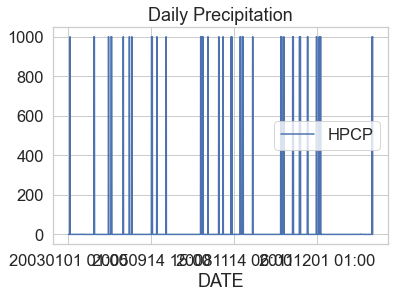

In [6]:
#initial graphs
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                             title="Daily Precipitation")
plt.show()

In [7]:
#Time Series Data Cleaning & Exploration
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [10]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [11]:
#reimport data using datetime
boulder_precip_2003_2013 = pd.read_csv(path,
                                   parse_dates=['DATE'],
                                   index_col=['DATE'],
                                   na_values=['999.99'])
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [15]:
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [16]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [17]:
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


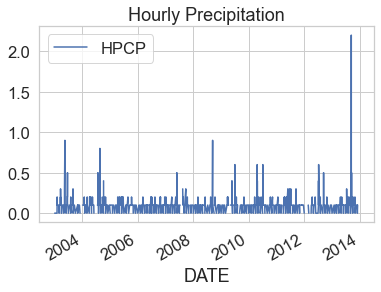

In [19]:
boulder_precip_2003_2013.plot(y="HPCP",
                             title="Hourly Precipitation")
plt.show()

In [20]:
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [21]:
precip_2005_clean = precip_2005.dropna()

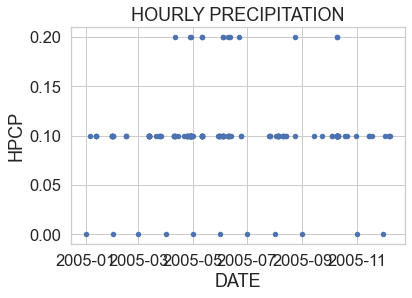

In [22]:
precip_2005_clean.reset_index().plot(x='DATE',
                                    y='HPCP',
                                    title='HOURLY PRECIPITATION',
                                    kind='scatter')
plt.show()

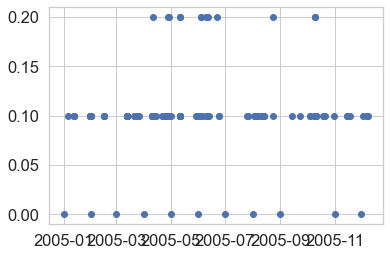

In [23]:
#plotting the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
          y=precip_2005_clean["HPCP"])
plt.show()

In [27]:
precip_2005_clean.resample("D").sum()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2005-01-01,1650.5,40.03389,-105.28111,0.0
2005-01-02,0.0,0.00000,0.00000,0.0
2005-01-03,0.0,0.00000,0.00000,0.0
2005-01-04,0.0,0.00000,0.00000,0.0
2005-01-05,1650.5,40.03389,-105.28111,0.1
...,...,...,...,...
2005-12-04,0.0,0.00000,0.00000,0.0
2005-12-05,0.0,0.00000,0.00000,0.0
2005-12-06,1650.5,40.03389,-105.28111,0.1


In [33]:
precip_2013 = boulder_precip_2003_2013['2013'].dropna()
precip_2012 = boulder_precip_2003_2013['2012'].dropna()

In [34]:
precip_2012

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2012-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2012-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-02-23 03:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-02-23 05:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-03-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
...,...,...,...,...,...,...,...,...
2012-12-11 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-12-19 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-12-24 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


In [47]:
p12=precip_2012['HPCP'].resample("h").sum().max()
p13=precip_2013['HPCP'].resample("h").sum().max()

if p12 > p13:
    print("Precipitation for 2012 is greater than 2013.")
else:
    print("Precipitation for 2013 is greater than 2012.")

Precipitation for 2013 is greater than 2012.


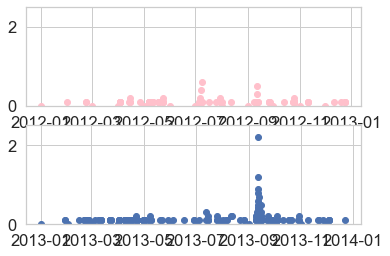

In [58]:
f, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(x=precip_2012.index.values,
           y=precip_2012["HPCP"],
           color="pink")
ax2.scatter(x=precip_2013.index.values,
           y=precip_2013["HPCP"])
ax1.set(ylim=[0,2.5])
ax2.set(ylim=[0,2.5])
plt.show()

In [65]:
precip_monthly = boulder_precip_2003_2013.resample("W").sum()

In [67]:
precip_monthly.dropna(how='all', inplace=True)

<AxesSubplot:xlabel='DATE'>

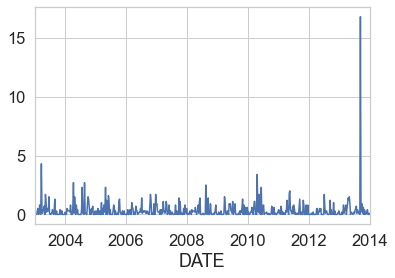

In [74]:
 precip_monthly['HPCP'].plot()

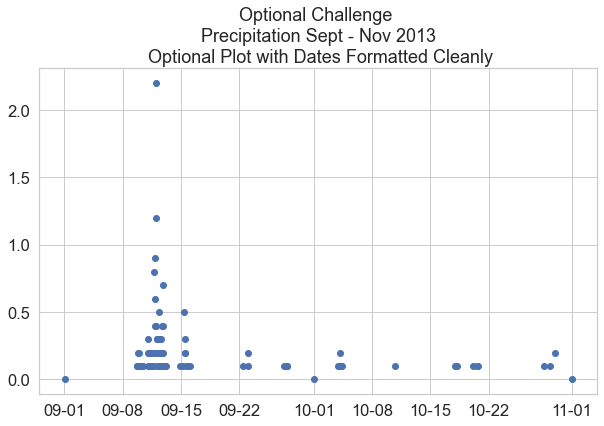

In [75]:
from matplotlib.dates import DateFormatter

flood_data = boulder_precip_2003_2013['2013-09-01':'2013-11-01']

f, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=flood_data.index.values,
           y=flood_data["HPCP"])

#DEFINE THE DATe FORMAT
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()
           


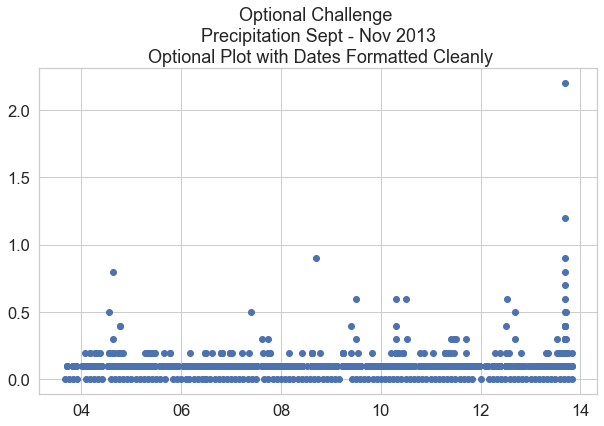

In [86]:
flood_data = boulder_precip_2003_2013['2003-09-01':'2013-11-01']

f, ax = plt.subplots(figsize=(10,6))

ax.scatter(x=flood_data.index.values,
           y=flood_data["HPCP"])

#DEFINE THE DATe FORMAT
date_form = DateFormatter("%y")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()

In [2]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/use-time-series-data-in-python/date-time-types-in-pandas-python/

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

#handle date time conversions between pandas and matplotlib
from pandas .plotting import register_matplotlib_converters
register_matplotlib_converters()

#use white grid plot background from seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [3]:
file_url = "https://ndownloader.figshare.com/files/12948515"
boulder_july_2018 = pd.read_csv(file_url)
boulder_july_2018.head()

,date,max_temp,precip
0,2018-07-01,87,0.00
1,2018-07-02,92,0.00
2,2018-07-03,90,-999.00
3,2018-07-04,87,0.00
4,2018-07-05,84,0.24


In [4]:
boulder_july_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      31 non-null     object 
 1   max_temp  31 non-null     int64  
 2   precip    31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


In [5]:
#check data type of first value in date column
type(boulder_july_2018['date'][0])

str

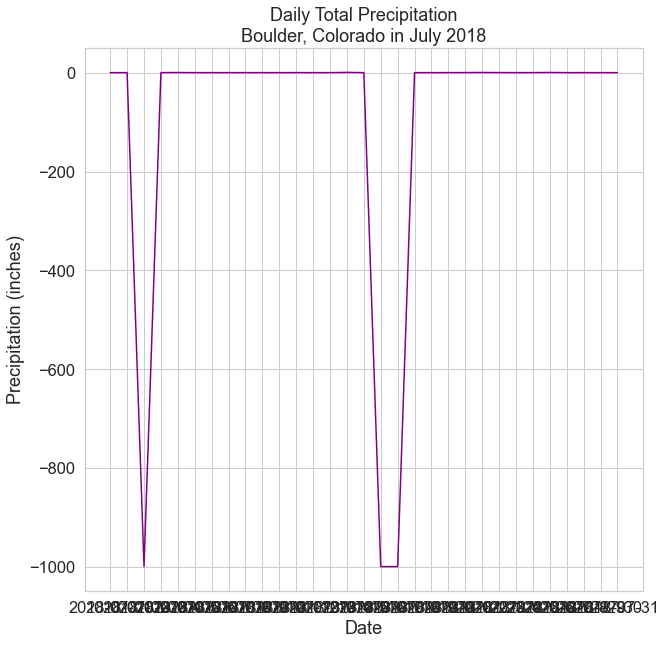

In [6]:
#plot date as strings

#create figure and a plot space
fig, ax = plt.subplots(figsize=(10,10))

#ad x and y-axis
ax.plot(boulder_july_2018['date'],
       boulder_july_2018['precip'],
       color = 'purple')

#set title and labels for axes
ax.set(xlabel='Date',
      ylabel='Precipitation (inches)',
      title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

plt.show()

In [16]:
file_url = "https://ndownloader.figshare.com/files/12948515"
boulder_july_2018 = pd.read_csv(file_url,
                               parse_dates=['date'],
                               index_col=['date'],
                               na_values=[-999])
boulder_july_2018.head()

,max_temp,precip
date,,
2018-07-01,87,0.00
2018-07-02,92,0.00
2018-07-03,90,NaN
2018-07-04,87,0.00
2018-07-05,84,0.24


In [8]:
boulder_july_2018.index

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
               '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
               '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
               '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
               '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
               '2018-07-29', '2018-07-30', '2018-07-31'],
              dtype='datetime64[ns]', name='date', freq=None)

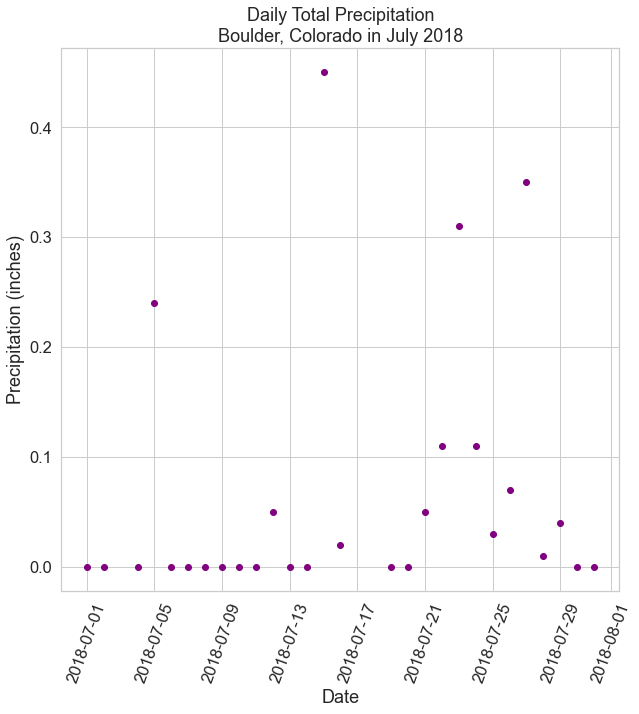

In [17]:
fig, ax = plt.subplots(figsize=(10,10))

#add x and y-axis
ax.scatter(boulder_july_2018.index.values,
        boulder_july_2018['precip'],
        color='purple')
# Set title and labels for axes

ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nBoulder, Colorado in July 2018")

#rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=70)

plt.show()

In [22]:
# Download the data
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with daily precip total
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-dailysum-2003-2013.csv")

Extracted output to /Users/ecuerbo/earth-analytics/data/colorado-flood/.


In [23]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       parse_dates=['DATE'],
                                       index_col= ['DATE'],
                                       na_values=['999.99'])

#additional info about the dataset at https://ndownloader.figshare.com/files/7283453
# View first few rows
boulder_precip_2003_2013.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,NaN,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [24]:
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2003-01-01 to 2013-12-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_PRECIP  788 non-null    float64
 1   STATION       792 non-null    object 
 2   STATION_NAME  792 non-null    object 
 3   ELEVATION     792 non-null    float64
 4   LATITUDE      792 non-null    float64
 5   LONGITUDE     792 non-null    float64
 6   YEAR          792 non-null    int64  
 7   JULIAN        792 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 55.7+ KB


In [25]:
boulder_precip_2003_2013.describe()

,DAILY_PRECIP,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
count,788.000000,792.0,792.000000,792.000000,792.000000,792.000000
mean,0.247843,1650.5,40.033850,-105.281106,2007.967172,175.541667
std,0.462558,0.0,0.000045,0.000005,3.149287,98.536373
min,0.000000,1650.5,40.033800,-105.281110,2003.000000,1.000000
25%,0.100000,1650.5,40.033800,-105.281110,2005.000000,96.000000
50%,0.100000,1650.5,40.033890,-105.281110,2008.000000,167.000000
75%,0.300000,1650.5,40.033890,-105.281100,2011.000000,255.250000
max,9.800000,1650.5,40.033890,-105.281100,2013.000000,365.000000


In [29]:
boulder_precip_2003_2013.loc['2013'].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


In [33]:
boulder_precip_2003_2013[boulder_precip_2003_2013.index.month==12].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


In [34]:
boulder_precip_2003_2013[boulder_precip_2003_2013.index.day==1].tail()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-08-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,213
2013-09-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,244
2013-10-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,274
2013-11-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,305
2013-12-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,335


In [35]:
#subset data to May-Aug 2005
precip_may_aug_2005 = boulder_precip_2003_2013['2005-05-01':'2005-08-31']
precip_may_aug_2005

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-05-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,121
2005-05-11,1.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,131
2005-05-30,0.5,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,150
2005-05-31,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,151
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152
2005-06-02,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,153
2005-06-03,0.3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,154
2005-06-04,0.7,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,155
2005-06-09,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,160


In [36]:
#check min and max values of index
print(precip_may_aug_2005.index.min())
print(precip_may_aug_2005.index.max())

2005-05-01 00:00:00
2005-08-23 00:00:00


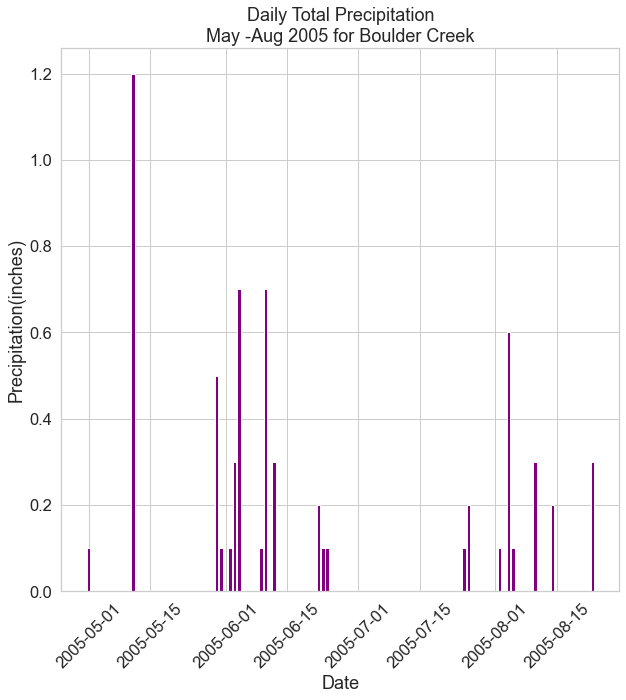

In [37]:
#plot temporal subsets fro pandas df
fig, ax = plt.subplots(figsize=(10,10))

#add xy-axes
ax.bar(precip_may_aug_2005.index.values,
      precip_may_aug_2005['DAILY_PRECIP'],
      color='purple')

#set tile and labels
ax.set(xlabel='Date',
      ylabel='Precipitation(inches)',
      title='Daily Total Precipitation\nMay -Aug 2005 for Boulder Creek')

#Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()

# RESAMPLING

In [39]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

#handling date time conversions betweenpandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#use whitegrid plot backgroud from seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [42]:
data = et.data.get_data('colorado-flood')

In [44]:
# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

# Define relative path to file with hourly precip
file_path = os.path.join("data", "colorado-flood",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

In [45]:
#import data using datetime and no data value
precip_2003_2013_hourly = pd.read_csv(file_path,
                                     parse_dates=['DATE'],
                                     index_col=['DATE'],
                                     na_values=['999.99'])

#view first few rows
precip_2003_2013_hourly.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [46]:
precip_2003_2013_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1840 entries, 2003-01-01 01:00:00 to 2013-12-31 00:00:00
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   STATION           1840 non-null   object 
 1   STATION_NAME      1840 non-null   object 
 2   ELEVATION         1840 non-null   float64
 3   LATITUDE          1840 non-null   float64
 4   LONGITUDE         1840 non-null   float64
 5   HPCP              1746 non-null   float64
 6   Measurement Flag  1840 non-null   object 
 7   Quality Flag      1840 non-null   object 
dtypes: float64(4), object(4)
memory usage: 129.4+ KB


In [47]:
#view summary statistics
precip_2003_2013_hourly.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [49]:
#view index values of dataframe
precip_2003_2013_hourly.index.values

array(['2003-01-01T01:00:00.000000000', '2003-02-01T01:00:00.000000000',
       '2003-02-02T19:00:00.000000000', ...,
       '2013-12-23T02:00:00.000000000', '2013-12-29T01:00:00.000000000',
       '2013-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

## Plot Hourly Precipitation Data

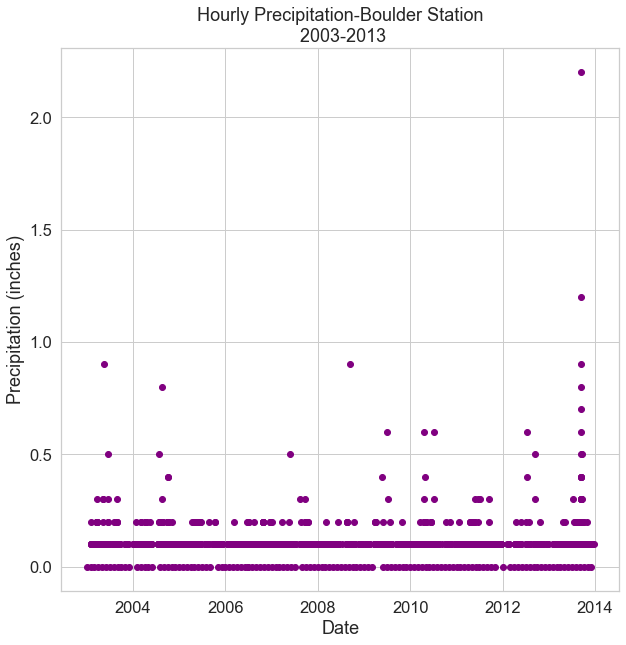

In [50]:
#create figure and plot space
fig, ax = plt.subplots(figsize=(10,10))

#add x-axis and y-axis
ax.scatter(precip_2003_2013_hourly.index.values,
           precip_2003_2013_hourly['HPCP'],
           color='purple')

#set tile and labels for axes
ax.set(xlabel='Date',
      ylabel='Precipitation (inches)',
      title="Hourly Precipitation-Boulder Station\n 2003-2013")

plt.show()

## Resample hourly data to daily data

In [52]:
#resample to daily precip sum and save as new df
precip_2003_2013_daily = precip_2003_2013_hourly.resample('D').sum()

'''#if you have not set the time stamp as index
precip_hourly_index = precip_hourly.set_index('DATE')'''

precip_2003_2013_daily

,ELEVATION,LATITUDE,LONGITUDE,HPCP
DATE,,,,
2003-01-01,1650.5,40.03389,-105.28111,0.0
2003-01-02,0.0,0.00000,0.00000,0.0
2003-01-03,0.0,0.00000,0.00000,0.0
2003-01-04,0.0,0.00000,0.00000,0.0
2003-01-05,0.0,0.00000,0.00000,0.0
...,...,...,...,...
2013-12-27,0.0,0.00000,0.00000,0.0
2013-12-28,0.0,0.00000,0.00000,0.0
2013-12-29,1650.5,40.03380,-105.28110,0.0


### Plot Daily Precipitation Data

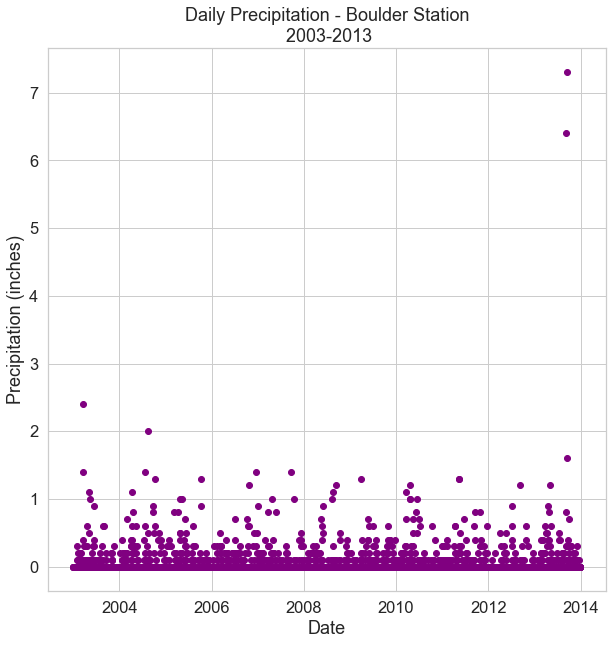

In [53]:
#create figure and plot space
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(precip_2003_2013_daily.index.values,
          precip_2003_2013_daily['HPCP'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Precipitation - Boulder Station\n 2003-2013")

plt.show()

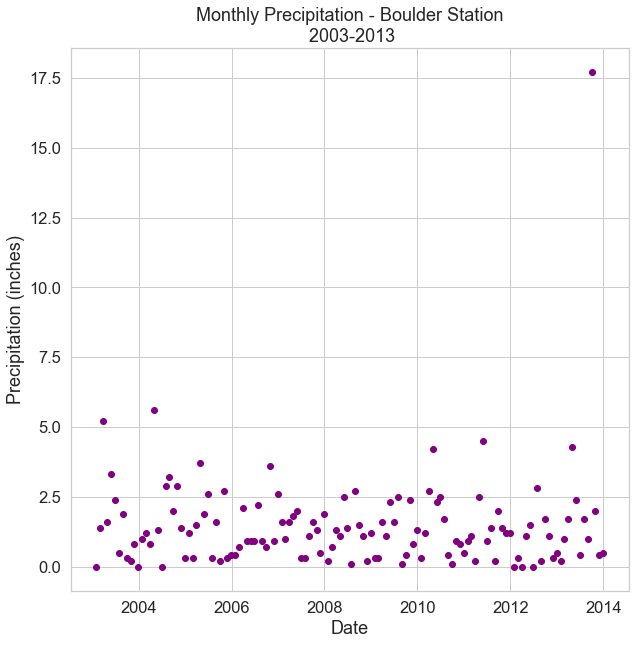

In [57]:
#resample to monthly
precip_2003_2013_monthly = precip_2003_2013_hourly.resample('M').sum()

#create figure and plot space
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(precip_2003_2013_monthly.index.values,
          precip_2003_2013_monthly['HPCP'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Precipitation - Boulder Station\n 2003-2013")

plt.show()

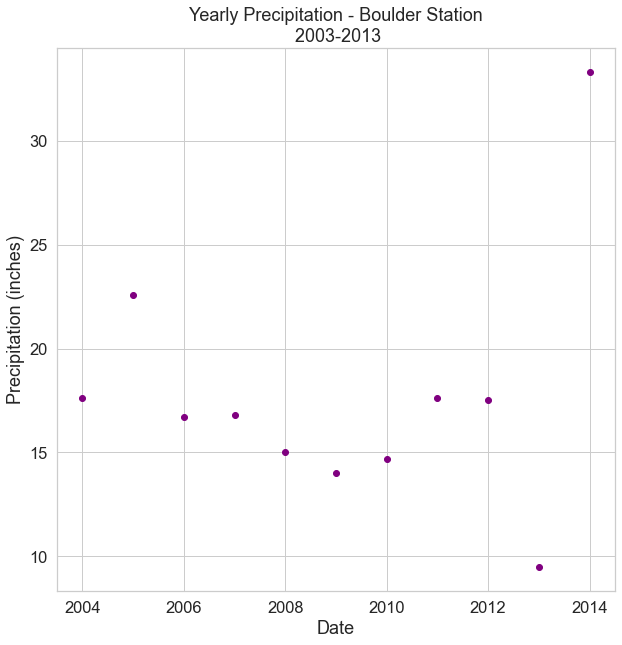

In [58]:
#resample to yearly
precip_2003_2013_yearly = precip_2003_2013_hourly.resample('Y').sum()

#create figure and plot space
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(precip_2003_2013_yearly.index.values,
          precip_2003_2013_yearly['HPCP'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Yearly Precipitation - Boulder Station\n 2003-2013")

plt.show()

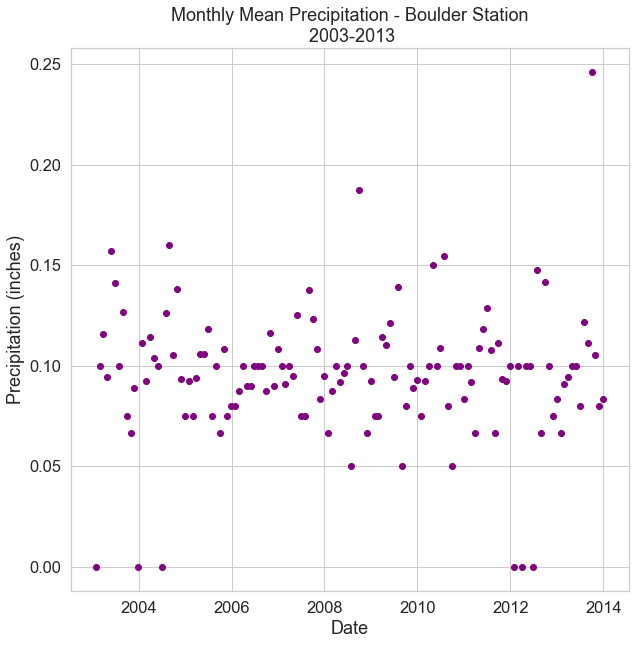

In [59]:
#resample to monthly mean
precip_2003_2013_monthly_mean = precip_2003_2013_hourly.resample('M').mean()

#create figure and plot space
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(precip_2003_2013_monthly_mean.index.values,
          precip_2003_2013_monthly_mean['HPCP'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Monthly Mean Precipitation - Boulder Station\n 2003-2013")

plt.show()

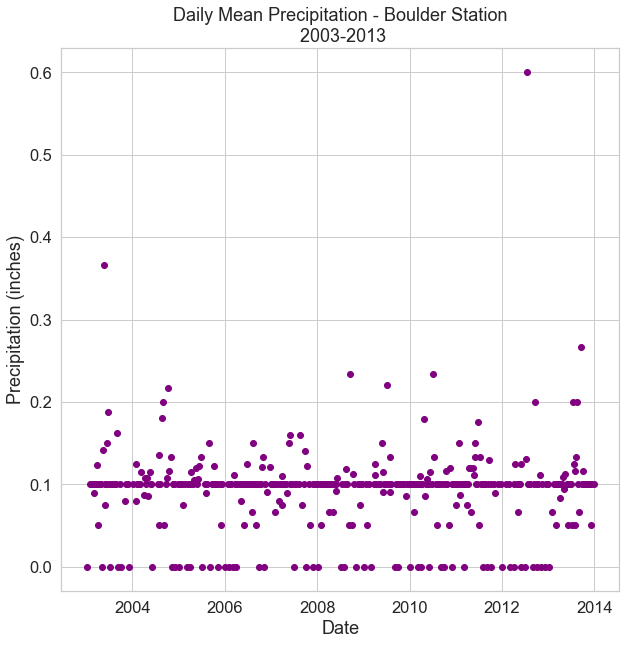

In [63]:
#resample to weekly mean
precip_2003_2013_weekly_mean = precip_2003_2013_hourly.resample('w').mean()

#create figure and plot space
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(precip_2003_2013_weekly_mean.index.values,
          precip_2003_2013_weekly_mean['HPCP'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Mean Precipitation - Boulder Station\n 2003-2013")

plt.show()

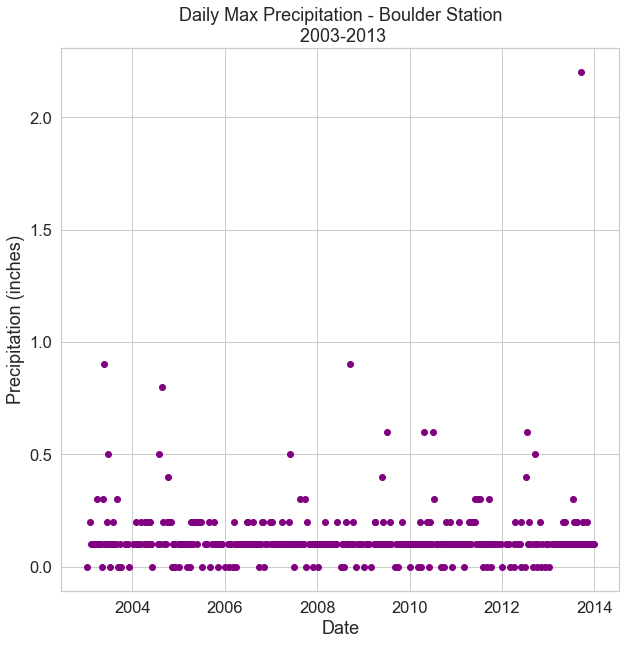

In [65]:
#resample to weekly min
precip_2003_2013_weekly_max = precip_2003_2013_hourly.resample('w').max()

#create figure and plot space
fig, ax = plt.subplots(figsize=(10,10))

#Add x-axis and y-axis
ax.scatter(precip_2003_2013_weekly_max.index.values,
          precip_2003_2013_weekly_max['HPCP'],
          color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Max Precipitation - Boulder Station\n 2003-2013")

plt.show()

## Customize dates on Pandas

In [69]:
#import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

#Handle date time conversions and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters

#use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

data = et.data.get_data('colorado-flood')

In [70]:
#set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

#Define relative path to file with daily precip
file_path = os.path.join("data", "colorado-flood","precipitation",
                         "805325-precip-dailysum-2003-2013.csv")

precip_2003_2013_daily = pd.read_csv(file_path,
                                    parse_dates=['DATE'],
                                    index_col=['DATE'],
                                    na_values=['999.99'])

# Subset data to June-Aug 2005
precip_june_aug_2005 = precip_2003_2013_daily['2005-06-01':'2005-08-31']

precip_june_aug_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152
2005-06-02,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,153
2005-06-03,0.3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,154
2005-06-04,0.7,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,155
2005-06-09,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,160


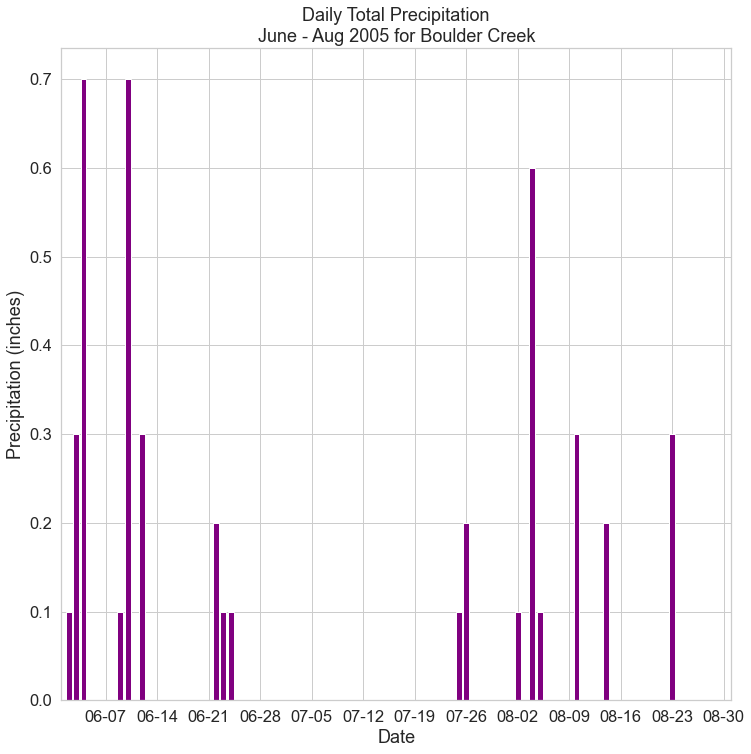

In [76]:
#create figure and plot space
fig, ax = plt.subplots(figsize=(12,12))

#add x-axis and y-axis
ax.bar(precip_june_aug_2005.index.values,
       precip_june_aug_2005['DAILY_PRECIP'],
       color='purple')

#set title and labels for axes
ax.set(xlabel='Date',
      ylabel='Precipitation (inches)',
      title="Daily Total Precipitation\nJune - Aug 2005 for Boulder Creek",
      xlim=["2005-06-01","2005-08-31"])

#define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

#Ensure a major tick for each week using (interval=1)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.show()